# Notas originales: [12 steps to N-S](https://www.theoj.org/jose-papers/jose.00021/10.21105.jose.00021.pdf)

# Difusion 2D
---------
La difusión en dos dimensiones esta dada por el par de ecuaciones

\begin{equation}
\frac{\partial u}{\partial t} = \nu \frac{\partial^2 u}{\partial x^2} + \nu \frac{\partial^2 u}{\partial y^2},
\end{equation}

se utiliza el mismo criterio de diferenciacion utilizado anteriormente, las ecuaciones diferenciales una vez discretizadas son

\begin{equation}
\frac{u^{n+1}_{i,j} - u^{n}_{i,j}}{\Delta t} = \nu \frac{u^{n}_{i+1,j} - 2u^{n}_{i,j} + u^{n}_{i-1,j}}{\Delta x^2} + \nu \frac{u^{n}_{i,j+1} - 2u^{n}_{i,j} + u^{n}_{i,j-1}}{\Delta y^2}
\end{equation}

despejando para $u^{n+1}_{i,j}$ obtenemos una ecuacion con la cual podemos avanzar en el tiempo

\begin{equation}
u^{n+1}_{i,j} = u^{n}_{i,j} + \frac{\nu \Delta t}{\Delta x^2} (u^{n}_{i+1,j} - 2u^{n}_{i,j} + u^{n}_{i-1,j}) + \frac{\nu \Delta t}{\Delta y^2} (u^{n}_{i,j+1} - 2u^{n}_{i,j} + u^{n}_{i,j-1}),
\end{equation}
el siguiente es un ejemplo para la misma función pulso anterior.

In [0]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Text(0.5, 0, '$y$')

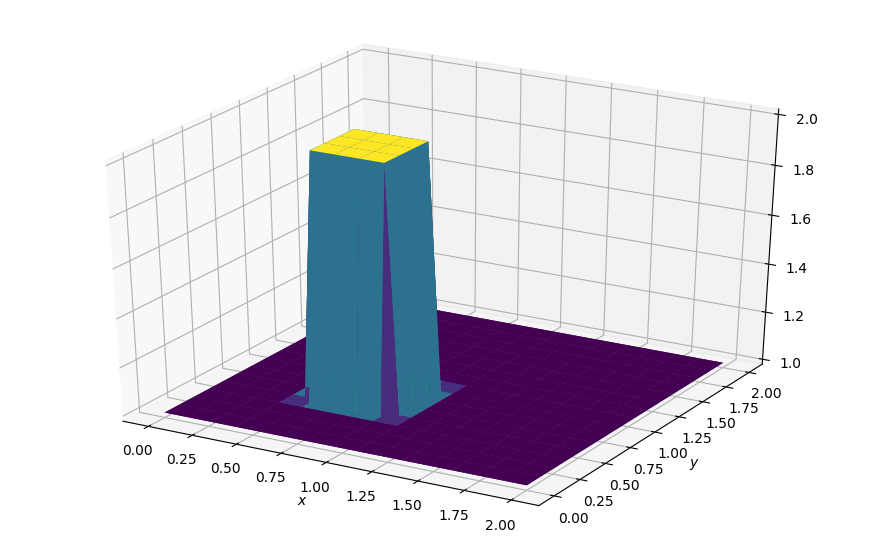

In [0]:
def pulso(x0, x1, y0, y1, x, y):
  if (x0 < x and x < x1) and (y0 < y and y < y1):
    return 1.0
  else:
    return 0.0

#declaración de variables
nx=31
ny=31
nt=17
nu=.05
Lx =2.0
Ly =2.0
Lz=2.5
dx = Lx/ (nx-1)
dy= Ly/(nx-1)
CFL=.25
dt=CFL*dx * dy/ nu

x = np.linspace(0, Lx, nx)
y = np.linspace(0, Ly, ny)

#vector de unos
u = np.ones((nx, ny))
#v = np.ones((nx, ny))
un = np.ones((nx, ny))
#vn = np.ones((nx, ny))

#condiciones iniciales
for i in range(nx):
  for j in range(ny):
    u[i,j] += pulso(0.5, 1.0, 0.5, 1.0, x[i], y[j])
    #v[i,j] += pulso(0.5, 1.0, 0.5, 1.0, x[i], y[j])

fig = plt.figure(figsize=(11, 7), dpi = 100)
ax = fig.gca(projection='3d')
X, Y = np.meshgrid(x, y)
surf = ax.plot_surface(X, Y, u, rstride=1, cstride=1, cmap=cm.viridis)
ax.plot_surface(X, Y, u, cmap=cm.viridis, rstride=2, cstride=2)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

In [0]:
def difusion(nt):
  for n in range(nt+1):
    un = u.copy()
    for i in range(1, nx-1):
      for j in range(1, ny-1):
        u[i,j] = un[i,j] + nu*dt*(un[i+1, j] - 2.0*un[i,j] + un[i-1,j])/(dx*dx) + nu*dt*(un[i, j+1] - 2.0*un[i,j] + un[i,j-1])/(dy*dy)
    
  u[0, :] = 1
  u[-1, :] = 1
  u[:, 0] = 1
  u[:, -1] = 1

  fig = plt.figure(figsize=(11, 7), dpi = 100)
  ax = fig.gca(projection='3d')
  X, Y = np.meshgrid(x, y)
  surf = ax.plot_surface(X, Y, u, rstride=1, cstride=1, cmap=cm.viridis)
  ax.plot_surface(X, Y, u, cmap=cm.viridis, rstride=2, cstride=2)
  ax.set_xlabel('$x$')
  ax.set_ylabel('$y$')

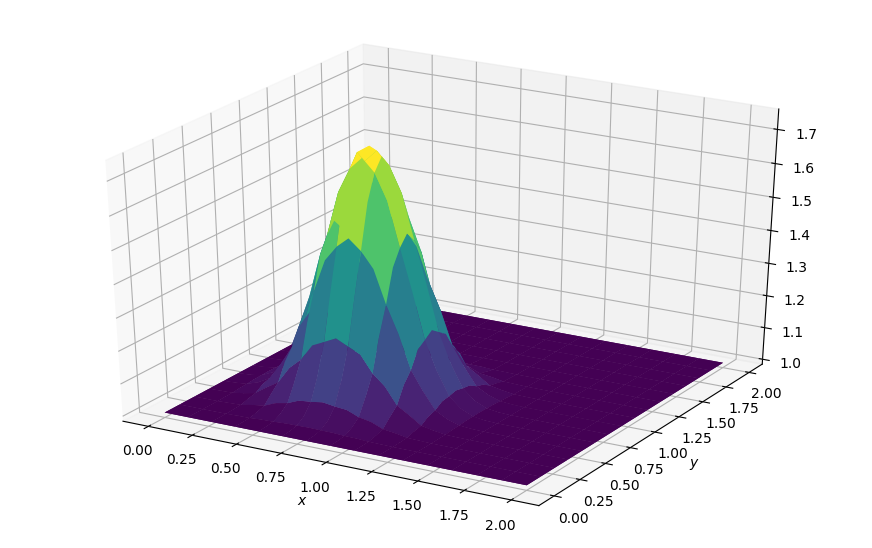

In [0]:
difusion(10)

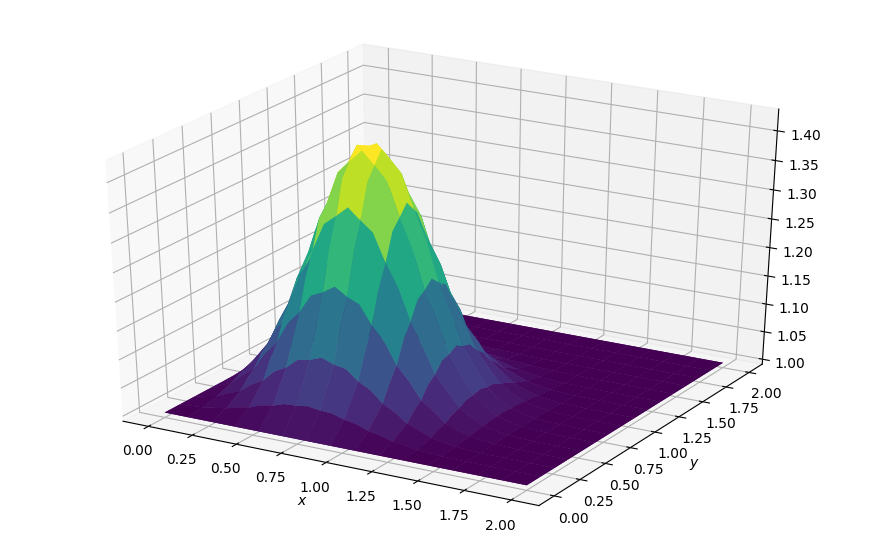

In [0]:
difusion(15)

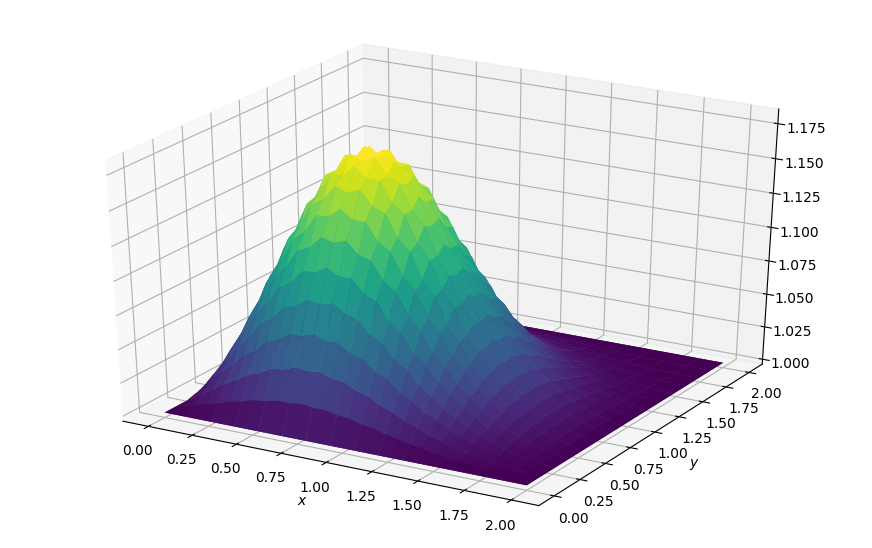

In [0]:
difusion(50)